In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Sample_data.csv')
df

,ID,Requirements,Risk,Documentation,Stakeholder Involvement,PMM
0,1,2,9,8,9,0
1,2,3,9,7,8,0
2,3,2,9,7,9,0
3,4,3,8,8,9,0
4,5,2,9,8,9,0
5,6,2,9,7,8,0
6,7,1,9,8,7,0
7,8,2,9,6,8,1
8,9,3,9,5,9,1
9,10,2,9,6,8,1


In [7]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# reading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# train test split
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LogisticRegression # LR

# classification error metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from keras.layers import Dense, Dropout

In [12]:
col_norm =['Requirements ', 'Risk', 'Documentation', 'Stakeholder Involvement']

#normalising the featured columns

df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )

X_Data = df1_norm
Y_Data = df["PMM"]

NameError: name 'X_Train' is not defined

In [14]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_Data, Y_Data,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 42)

X_train

,Requirements,Risk,Documentation,Stakeholder Involvement
8,0.222222,1.000,0.500000,1.000000
3,0.222222,0.875,1.000000,1.000000
6,0.000000,1.000,1.000000,0.714286
39,0.555556,0.375,1.000000,0.142857
33,0.555556,0.000,1.000000,0.000000
13,0.222222,0.875,0.500000,1.000000
17,0.888889,0.250,0.000000,0.285714
45,0.444444,0.125,1.000000,0.285714
15,0.222222,1.000,0.833333,0.714286
9,0.111111,1.000,0.666667,0.857143


In [15]:
# checking shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38, 4) (10, 4) (38,) (10,)


In [16]:
# storing general model
LR = LogisticRegression()
# fit the model 
LR = LR.fit(X_train, y_train)

In [17]:
# store the predictions
train_pred= LR.predict(X_train) 
test_pred = LR.predict(X_test) 

In [18]:
confusion_matrix(y_train, train_pred)

array([[ 0,  6,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  0, 11,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [20]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3

    accuracy                           0.90        10
   macro avg       0.62      0.75      0.67        10
weighted avg       0.85      0.90      0.87        10



C:\Users\waylo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


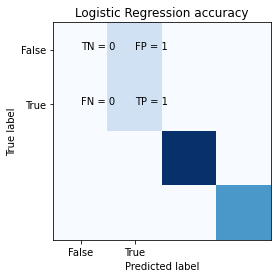

In [21]:
# confusion matrix

cm = confusion_matrix(y_test, test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('Logistic Regression accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
